In [2]:
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [3]:
# Load datasets
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train_full.shape)
print(y_train_full.shape)

(60000, 28, 28)
(60000,)


In [5]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# Create a function that visualizes a digit and its corresponding label
def visualize_pixel(index):
  plt.figure(figsize=(4,4))
  plt.imshow(x_train_full[index])
  plt.xlabel(y_train_full[index])

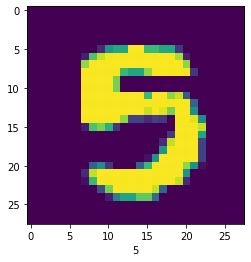

In [9]:
visualize_pixel(620)

In [10]:
# Splitting training data from validation data
# Rescale the input for Gradient Descent optimization
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
x_test = x_test/255.0

# Reshape the output
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
model = Sequential([
    Flatten(input_shape=(28, 28)), # the input shape is the size of each image
    Dense(units = 500, activation='relu'),
    Dense(units = 200, activation='relu'),
    Dense(units = 10, activation='softmax') # The number of output units is the number of output classes
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy', # used when y is a scalar value
              optimizer='sgd', # stochastic gradient descent
              metrics = ['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=10, validation_data=[x_valid, y_valid])

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5942 - accuracy: 0.8514 - val_loss: 0.3043 - val_accuracy: 0.9186
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2811 - accuracy: 0.9198 - val_loss: 0.2363 - val_accuracy: 0.9352
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2274 - accuracy: 0.9351 - val_loss: 0.1981 - val_accuracy: 0.9458
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1929 - accuracy: 0.9451 - val_loss: 0.1719 - val_accuracy: 0.9530
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1670 - accuracy: 0.9526 - val_loss: 0.1571 - val_accuracy: 0.9578
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1471 - accuracy: 0.9581 - val_loss: 0.1405 - val_accuracy: 0.9616
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1309 - accuracy: 0.9625 - val_loss: 0.1270 - val_accur

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1031 - accuracy: 0.9692


[0.10310256481170654, 0.9692000150680542]